# [E-03] Camera_sticker 만들기


## 순서
## 1. 이미지 전처리
## 2. 모델 선택 및 좌표 지정
## 3. 스티커 전처리 및 적용
## 4. 다양한 변수에서는 어떻게?
## 5. 정리 및 회고

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

## 1. 준비한 이미지 불러오기 
- opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용 -> RGB로 색깔 보정 처리, 원래 색상으로 보임
- 그래서 처음에는 푸르딩딩하게 보이고 색 보정을 통해 원래 색으로 보임

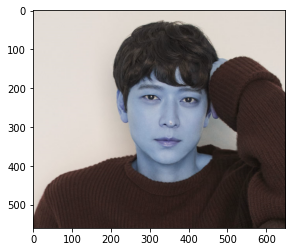

In [2]:
# 변환 전
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/best.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 가져오기, 컬러가 Default, cv2.IMREAD_GRAYSCALE 넣어주면 흑백으로 준비 
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

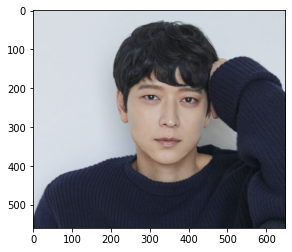

In [3]:
# 변환 후 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. detector 선언  
- dlib 활용 그중에서 정면얼굴 검출기 dlib.get_frontal_face_detector()  
- bounding box 만들어서 얼굴 위치 잡기 

In [4]:
detector_hog = dlib.get_frontal_face_detector()  

# bounding box 추출
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

rectangles[[(241, 167) (464, 390)]]


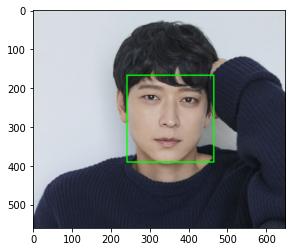

In [5]:
# 찾은 얼굴을 화면에 출력하기 
print(dlib_rects)   

# LINE_4 = 4, LINE_8 = 8, LINE_AA = 16
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)  

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
# 마크다운 이미지  ![이미지 이름](이미지 주소)
from IPython.display import Image

## 3. Landmark 좌표 지정하기
- 마크다운 이미지 넣기 위해 사용, 바로 적용해보기(feat.공동휘님)
- 저장한 landmark 모델 불러오기 
- dlib landmark 68개 찾고 좌표 저장하기
![landmark](camera_sticker/images/landmark.png)

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 전체 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# print(len(list_landmarks[0])) 랜드마크 68개 
# print(list_landmarks)

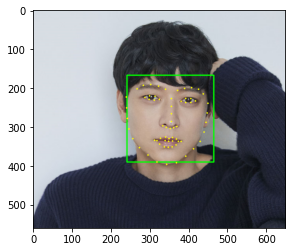

In [8]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)   # 두께가 -1 이므로 색상 채우기
                                                            # 노란색 점(0, 255, 255)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 4. 스티커 적용 위치 확인하기
- 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산

### 스티커 붙일 좌표 확인하기 
- 코끝 index는 33 
- 스티커 그림 불러와서 resize 시키기
- 얼굴 박스에서 중간 위치이므로 //2 

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0]   # x,y 좌표는 변함 없으므로 그대로 사용
    y = landmark[33][1]    
    w = h = dlib_rect.width() # 얼굴 영역 박스의 폭과 높이 

    print(f'(x, y) : ({x}, {y})')
    print(f'(w, h) : ({w}, {h})')

(352, 304)
(x, y) : (352, 304)
(w, h) : (224, 224)


(224, 224, 3)


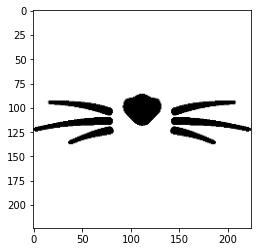

In [10]:
# 스티커 그림 불러와서 
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

In [11]:
# resize 시키기
refined_x = x - w // 2
refined_y = y - h // 2

print(f'(refined_x, refined_y) : {refined_x}, {refined_y}')
# print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 위 아래 동일 코드 

(refined_x, refined_y) : 240, 192


# 5. 스티커 적용하기
- 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.
- 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. 

In [12]:
# 밖으로 벗어나지 않으므로 생략 
# if refined_x < 0: 
#     img_sticker = img_sticker[:, -refined_x:]
#     refined_x = 0
# if refined_y < 0:
#     img_sticker = img_sticker[-refined_y:, :]
#     refined_y = 0

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [13]:
# np.where 예시
A = np.array([1,2,3,4,5,6])
# 3보다 큰 값의 '위치'를 찾고 
# np.where(A>3)     #(array([3, 4, 5]),) 인덱스 3,4,5번 위치 

# 3보다 크면 100, 아니면 0으로 바꾸기 
np.where(A>3, 100, 0)

array([  0,   0,   0, 100, 100, 100])

원본 이미지에 고양이 수염이 그려지는 것은 그냥 붙여 넣는 것이 아님
원본 이미지 픽셀값을 -> 고양이 수염 픽셀값으로 바꿔서 이미지가 겹쳐지는 것처럼 보임
고양이 수염 전체 이미지(img_sticker) 픽셀을 다 사용하면 원본 이미지가 가려짐
* 고양이 수염 그림 중 픽셀값이 검정색이면 고양이 수염으로 남기고(img_sticker), 픽셀값이 검정색이 아니면 원본 이미지(sticker_area)로 나타내기 
- **img_sticker가 검정색이면 img_sticker로 바꿔라, 검정색이 아닌건 sticker_area(원본)로 나타내라** 

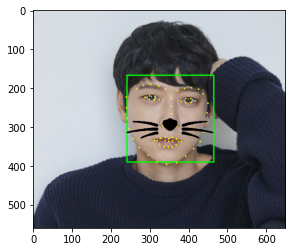

In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- img_bgr 원본파일에 고양이 수염 스티커를 넣고 나머지는 제거 

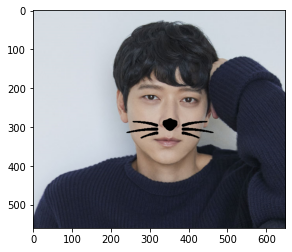

In [15]:
# np.where 위의 코드와 동일한 의미 
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 루브릭을 위한 다른 이미지 테스트 시작!
### 1. 촬영 거리가 멀어서 얼굴 크기가 작을 경우 

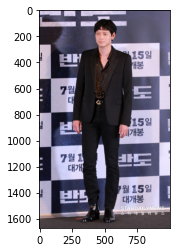

In [16]:
# 이미지 불러오고 rgb로 변환
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/best_far.png'
img_bgr = cv2.imread(my_image_path)   
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()
plt.imshow(img_rgb)
plt.show()

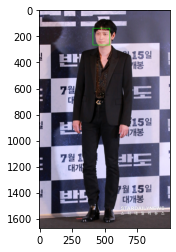

In [17]:
# dlib 불러오기 
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)

# 얼굴 박스 그리기 
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)  

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

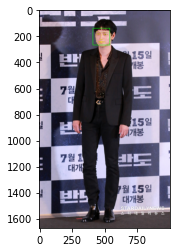

In [18]:
# landmark 표시하기 
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [19]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0]   
    y = landmark[33][1]    
    w = h = dlib_rect.width() 

    print(f'(x, y) : ({x}, {y})')
    print(f'(w, h) : ({w}, {h})')
    
# 스티커 그림 불러와서 
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# resize 시키기
refined_x = x - w // 2
refined_y = y - h // 2
print(f'(refined_x, refined_y) : {refined_x}, {refined_y}')


(474, 228)
(x, y) : (474, 228)
(w, h) : (130, 130)
(refined_x, refined_y) : 409, 163


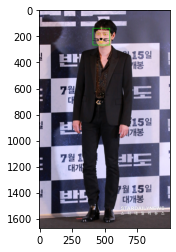

In [20]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

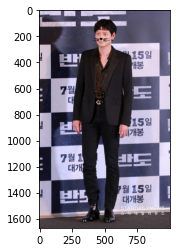

In [21]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 2. 옆모습인 경우 
- 이 부분에서 이미 얼굴 박스를 제대로 인식하지 못함, 더이상 진행 X

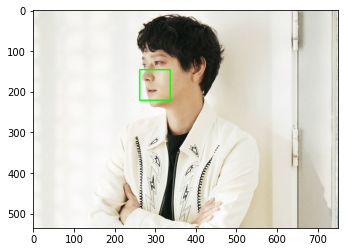

In [22]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/best_side.png'
img_bgr = cv2.imread(my_image_path)   
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()

detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)  

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


### 3. 사진이 어두운 경우 

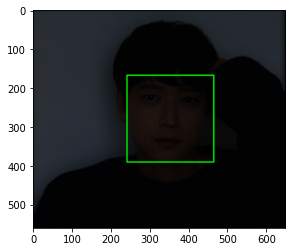

In [23]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/best_dark.png'
img_bgr = cv2.imread(my_image_path)   
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()

detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)  

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


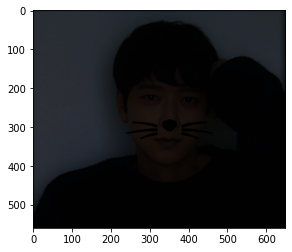

In [24]:
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]   
    y = landmark[33][1]    
    w = h = dlib_rect.width() 


# 스티커 그림 불러와서 
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# resize 시키기
refined_x = x - w // 2
refined_y = y - h // 2

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 정리 및 회고
1. **촬영 거리가 멀어서** 얼굴 크기가 작더라도 인식되어서 스티커가 제대로 붙음 **성공!!**
2. **옆모습**인 경우 랜드마크가 제대로 다 보이지 않아서 그런지 얼굴 박스가 제대로 그려지지 않음 **실패**
3. 사진이 **어두운 경우**라도 얼굴 박스 인식되어서 스티커 제대로 붙음 **성공!!**
- 거리나 밝기 변수 보다 <span style = 'color:red'>**각도의 변수에 영향을 많이 받는 것**</span>을 알 수 있음 


### dlib 라이브러리는 얼굴 감지에 사용할 수 있는 두 가지 기능을 제공
1. HOG + Linear SVM: dlib.get_frontal_face_detector()
    - <span style = 'color:red'>**회전 및 시야각의 변화가 변하지 않아서 한계</span>가 있음, 그래서 위 2번 사진처럼 정면이 아닌 다른 부분이 보인다면 제대로 인식하지 못함**
2. MMOD CNN: dlib.cnn_face_detection_model_v1(modelPath)

참고 : https://www.pyimagesearch.com/2021/04/19/face-detection-with-dlib-hog-and-cnn/

- 여기저기 찾으면서 mmod_human_face_detector.dat.bz2 파일을 받음 
- bz2는 zip과 같이 압축파일이여서 이걸 풀어서 ~.dat 파일을 사용하려고 했는데 저걸 못품....
- np.where에서 이해가 잘 되지 않아 시간이 한참 걸렸지만 이해가 되어서 속이 시원!!!
- 마크다운을 다양한 방식으로 써보면서 좀더 익숙해짐 
